# Drone Strike EDA Analysis

---

Since the API from `api.dronestre.am` provides data on drone strikes in near real time, this might be useful to hold the President accountable if he/she promises to reduce drone strikes. 

**Your mission:** 
- Explore the drone strike data and describe it
- Do some accompanying research to augment your analysis
- Report back any good summary statistics

**Also, we would like to know:**
 - Is this a good source of data?
 - Why / why not?


One of the needs for data science in organizations is to bring measure to vague problems. What can be measured in this dataset with certainty? Drive your presentation from what can be measured, reported. 

Also, if possible, suggest what can be done with this data in terms of actionable outcomes and to what extent.
     
*Keep politics out of the presentation and group work. Let's keep the work and discussion to the data: what is measurable and insights we can draw.  This data isn't meant to prove or disprove anything. It's intended to be an interesting dataset to look at, not a platform for political discourse.*

## Analysis and Data Science insights by Nasrudin Salim

### Retrieve the Data from api

In [100]:
import requests

data = requests.get("http://api.dronestre.am/data").json()['strike']

### Converting the data to something readable

In [101]:
import pandas as pd
df = pd.DataFrame(data)

### Munging

In [102]:
import numpy as np

In [103]:
#set _id as the index
df.set_index('_id',inplace=True)

#Get rid of any redundant categories which does not have any useful tag for differentiation
for i in df.columns:
    if len(np.unique(df[i].values)) ==1:
        df.drop(i,axis=1,inplace=True)

In [104]:
#Fix any wrong format types
df['date'] = pd.to_datetime(df['date'])

#### make a loop to clean
    Get rid of the blanks and changing it to 0

In [105]:
cleancolumns = ['children','civilians','lat','lon','deaths_min','deaths_max','injuries']

for column in cleancolumns:
    newnumber =[]
    blankmask = df[column] == ""
    df.loc[blankmask,column] =0
    for string in df[column]:
        #make it case insensitive
        try:
            string = string.lower()
            try:
                newnumber.append(float(string))
            except ValueError:
                #convert the strings into numbers
                if "possibl" in string or "according" in string  or "mar" in string or "yes" in string:
                    newnumber.append(1)
                elif "at least" in string:
                    newnumber.append(string[len("At least ")+1:])
                #if its a range, take the max
                elif "-" in string:
                    newnumber.append((string.split('-'))[1])
                elif "some" in string or "several" in string:
                    newnumber.append(4)
                elif "dozens" in string or 'many' in string:
                    newnumber.append(20)
                
                elif '?' in string or "unknown" in string:
                    newnumber.append(0)
                else:
                    newnumber.append(string.split()[0])
        except: #if trying to make it into lower fails, it's already a float
            newnumber.append(float(string))
            
    df[column]=newnumber
        


## Engineering

#### Create a year column

In [106]:
df['year'] = df.date.apply(lambda x: x.year)

#### 'Deaths' has a lot of ambiguous values, we shall take deaths to be the mid point between max and min. Then drop both of them.

In [107]:
death = ( pd.to_numeric(df['deaths_max'],errors='raise') + pd.to_numeric(df['deaths_min'],errors='raise') ) 
death /= 2


In [108]:
df['deaths'] = death
df.drop( ['deaths_max','deaths_min' ],axis=1, inplace = True, errors='ignore')

#### Change the number columns to numerical

In [163]:
columnstonumeric = ['children','deaths','civilians','lat','lon','injuries']

for i in columnstonumeric:
    df[i] = pd.to_numeric(df[i])
  

In [110]:
#resort the dataframe
df.sort_values('date',axis=0,inplace=True)

## What sort of information are there?

In [111]:
for i in df.columns:
    print (i)

bij_link
bij_summary_short
bureau_id
children
civilians
country
date
deaths
injuries
lat
location
lon
names
narrative
number
target
town
tweet_id
year


In [112]:
df.head()

,bij_link,bij_summary_short,bureau_id,children,civilians,country,date,deaths,injuries,lat,location,lon,names,narrative,number,target,town,tweet_id,year
_id,,,,,,,,,,,,,,,,,,,
55c79e711cbee48856a30886,http://www.thebureauinvestigates.com/2012/03/2...,In the first known US targeted assassination u...,YEM001,0,0,Yemen,2002-11-03,6.0,0,15.474670,Marib Province,45.322755,"[Qa'id Salim Sinan al-Harithi, Abu Ahmad al-Hi...",In the first known US targeted assassination u...,1,,,278544689483890688,2002
55c79e711cbee48856a30887,http://www.thebureauinvestigates.com/2011/08/1...,First known drone strike in Pakistan kills at ...,B1,2,2,Pakistan,2004-06-17,7.0,1,32.305126,South Waziristan,69.576244,"[Nek Mohammad, Fakhar Zaman, Azmat Khan, Marez...",The first known fatal US drone strike inside P...,2,Nek Mohammed,Wana,278544750867533824,2004
55c79e711cbee48856a30888,http://www.thebureauinvestigates.com/2011/08/1...,"Two killed, including Haitham al-Yemeni an al ...",B2,0,0,Pakistan,2005-05-08,2.0,0,32.986780,North Waziristan,70.260830,"[Haitham al-Yemeni, Samiullah Khan]",2 people killed in a Predator strike which rep...,3,Haitham al-Yemeni,Toorikhel,278544812255367168,2005
55c79e721cbee48856a30889,http://www.thebureauinvestigates.com/2011/08/1...,"Failed strike against Abu Hamza Rabia (""al Qae...",B3,3,8,Pakistan,2005-11-05,8.0,1,32.999882,North Waziristan,70.340824,[],A failed strike destroyed Abu Hamza Rabia's ho...,4,Abu Hamza Rabia,Mosaki,278544854483628032,2005
55c79e721cbee48856a3088a,http://www.thebureauinvestigates.com/2011/08/1...,"Syrian Abu Hamza Rabia, the senior al Qaeda op...",B4,2,2,Pakistan,2005-12-01,5.0,0,33.008663,North Waziristan,70.041962,"[Abu Hamza Rabia, Suleiman al-Moghrabi, Amer A...","5 people were killed, including 2 children, wh...",5,Abu Hamza Rabia,Haisori,278544895789133825,2005


In [113]:
df['deaths'].describe()

count    647.000000
mean       7.445131
std        9.646123
min        0.000000
25%        3.500000
50%        5.000000
75%        8.000000
max      175.000000
Name: deaths, dtype: float64

#  Insights

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.style.use('fivethirtyeight')


### What is the earliest and latest drone strike recorded?

In [115]:
print ("The earliest recorded drone strike was on",df.date.min(),
       "\nThe latest recorded drone strike was on", df.date.max())

The earliest recorded drone strike was on 2002-11-03 00:00:00 
The latest recorded drone strike was on 2017-03-06 00:00:00


## What countries are being targeted?

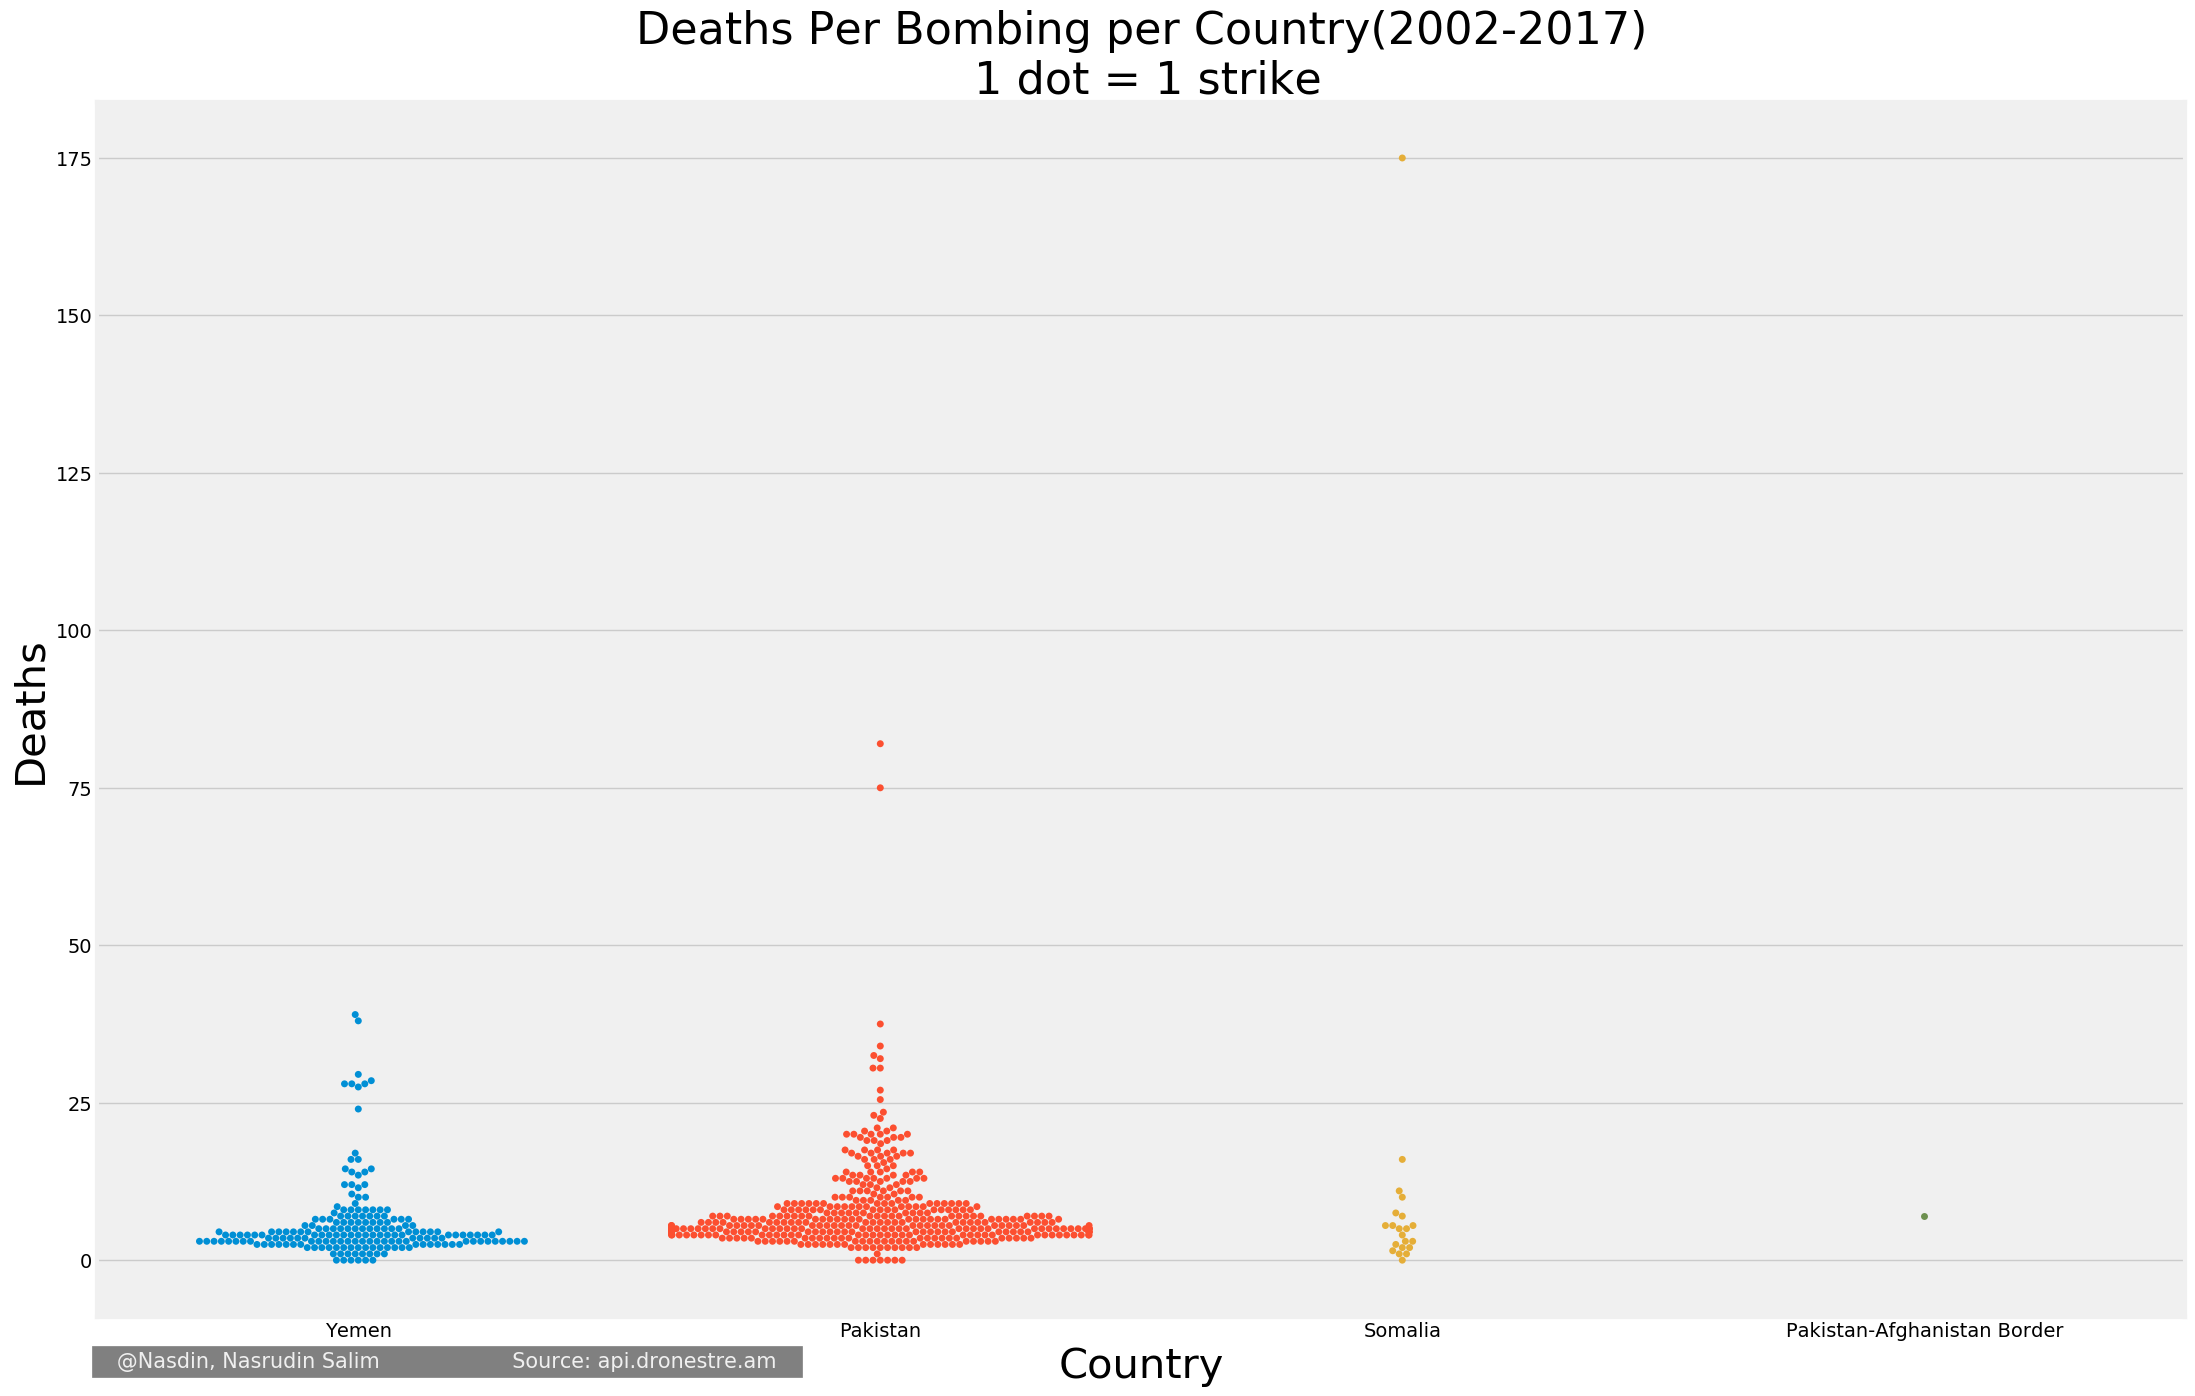

In [279]:
#The size 
_= plt.figure(num=None,figsize=(24,15),dpi=100,facecolor='w',edgecolor='k')

sns.swarmplot(df['country'],df['deaths'],size=5)
plt.title('Deaths Per Bombing per Country(2002-2017)\n 1 dot = 1 strike',fontsize=32)
plt.xlabel('Country',fontsize=30)
plt.ylabel('Deaths',fontsize=30)

#Signature Bar
plt.text(x=-0.5,y=-17,
    s = '   @Nasdin, Nasrudin Salim                    Source: api.dronestre.am   ',
    fontsize = 15, color = '#f0f0f0', backgroundcolor = 'grey')
#save the plot
plt.savefig('deathsperbombingpercountry.png')
plt.show()


The United States administration has agreed to reduce the amount of drone strikes per year. Below I visuallize the amount of strikes per year and the deaths every year

# Drone strike deaths per year

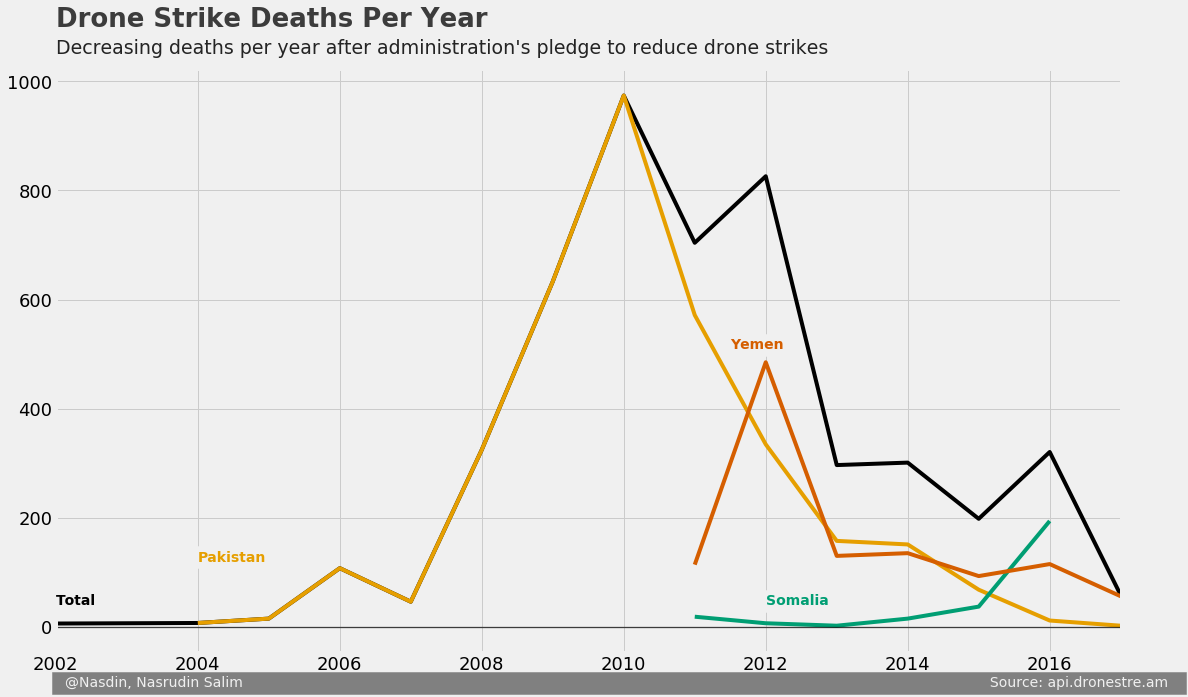

In [277]:
# Colourblind-friendly colours
colours = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255], 
          [213/255,94/255,0], [0,114/255,178/255]]

#Group by country and year, then take by deaths. Get a dataframe by taking sum of all deaths in that year
drone_strikes_annual_deaths = df.groupby(['country','year'])['deaths'].sum().reset_index(name='Deaths')

#Create a Total deaths combining all countries, and update the original dataframe
##Get the dataframe for all countries and sum of deaths
allcountries = pd.DataFrame(data={'country':'All','year':df.groupby('year').sum().index,'Deaths':df.groupby('year').sum()['deaths']})

##Add the all countries stats into the original dataframe
drone_strikes_annual_deaths= pd.concat([drone_strikes_annual_deaths,allcountries])

##reset the index
drone_strikes_annual_deaths.set_index(np.arange(0,drone_strikes_annual_deaths.shape[0]),inplace=True)

#plt the graph of the drone strikes deaths

deaths_plot=drone_strikes_annual_deaths.pivot(index='year', columns='country', values='Deaths').plot(figsize=(17,10), color=colours, legend=False)

deaths_plot.figure.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
deaths_plot.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.xlabel("")

# Generate a bolded horizontal line at y = 0 
deaths_plot.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
# Add an extra vertical line by tweaking the range of the x-axis
deaths_plot.set_xlim(left = 2002, right = 2017)



# The signature bar

deaths_plot.text(x = 2002, y = -110,
    s = '  @Nasdin, Nasrudin Salim                                                                                                                                                                      Source: api.dronestre.am   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')


# Adding a title and a subtitle
deaths_plot.text(x = 2002, y = 1100, s = "Drone Strike Deaths Per Year",
               fontsize = 26, weight = 'bold', alpha = .75)
deaths_plot.text(x = 2002, y = 1050, 
               s = "Decreasing deaths per year after administration's pledge to reduce drone strikes",
              fontsize = 19, alpha = .85)

# Add colored labels
deaths_plot.text(x = 2002, y =40 , s = 'Total', color = colours[0], weight = 'bold', rotation = 0,
              backgroundcolor = '#f0f0f0')
deaths_plot.text(x = 2004, y = 120, s = 'Pakistan', color = colours[1], weight = 'bold', rotation = 0,
              backgroundcolor = '#f0f0f0')
# deaths_plot.text(x = 2003, y =10 , s = 'Pakistan-Afghanistan Border', color = colours[2], weight = 'bold', rotation = 0,
#               backgroundcolor = '#f0f0f0')
deaths_plot.text(x = 2012, y = 40, s = 'Somalia', color = colours[3], weight = 'bold', rotation = 0, 
               backgroundcolor = '#f0f0f0')
deaths_plot.text(x = 2011.5, y = 510, s = 'Yemen', color = colours[4], weight = 'bold', rotation = 0,
              backgroundcolor = '#f0f0f0')

plt.savefig("dronestikedeathsperyear.png")
plt.show()

# How dangerous were the drone strikes?

### Were there improvements over time?

Here we examine the amount of victims per drone strike.
We also note the trend and scale of the attacks through the years and observe the inflection points.

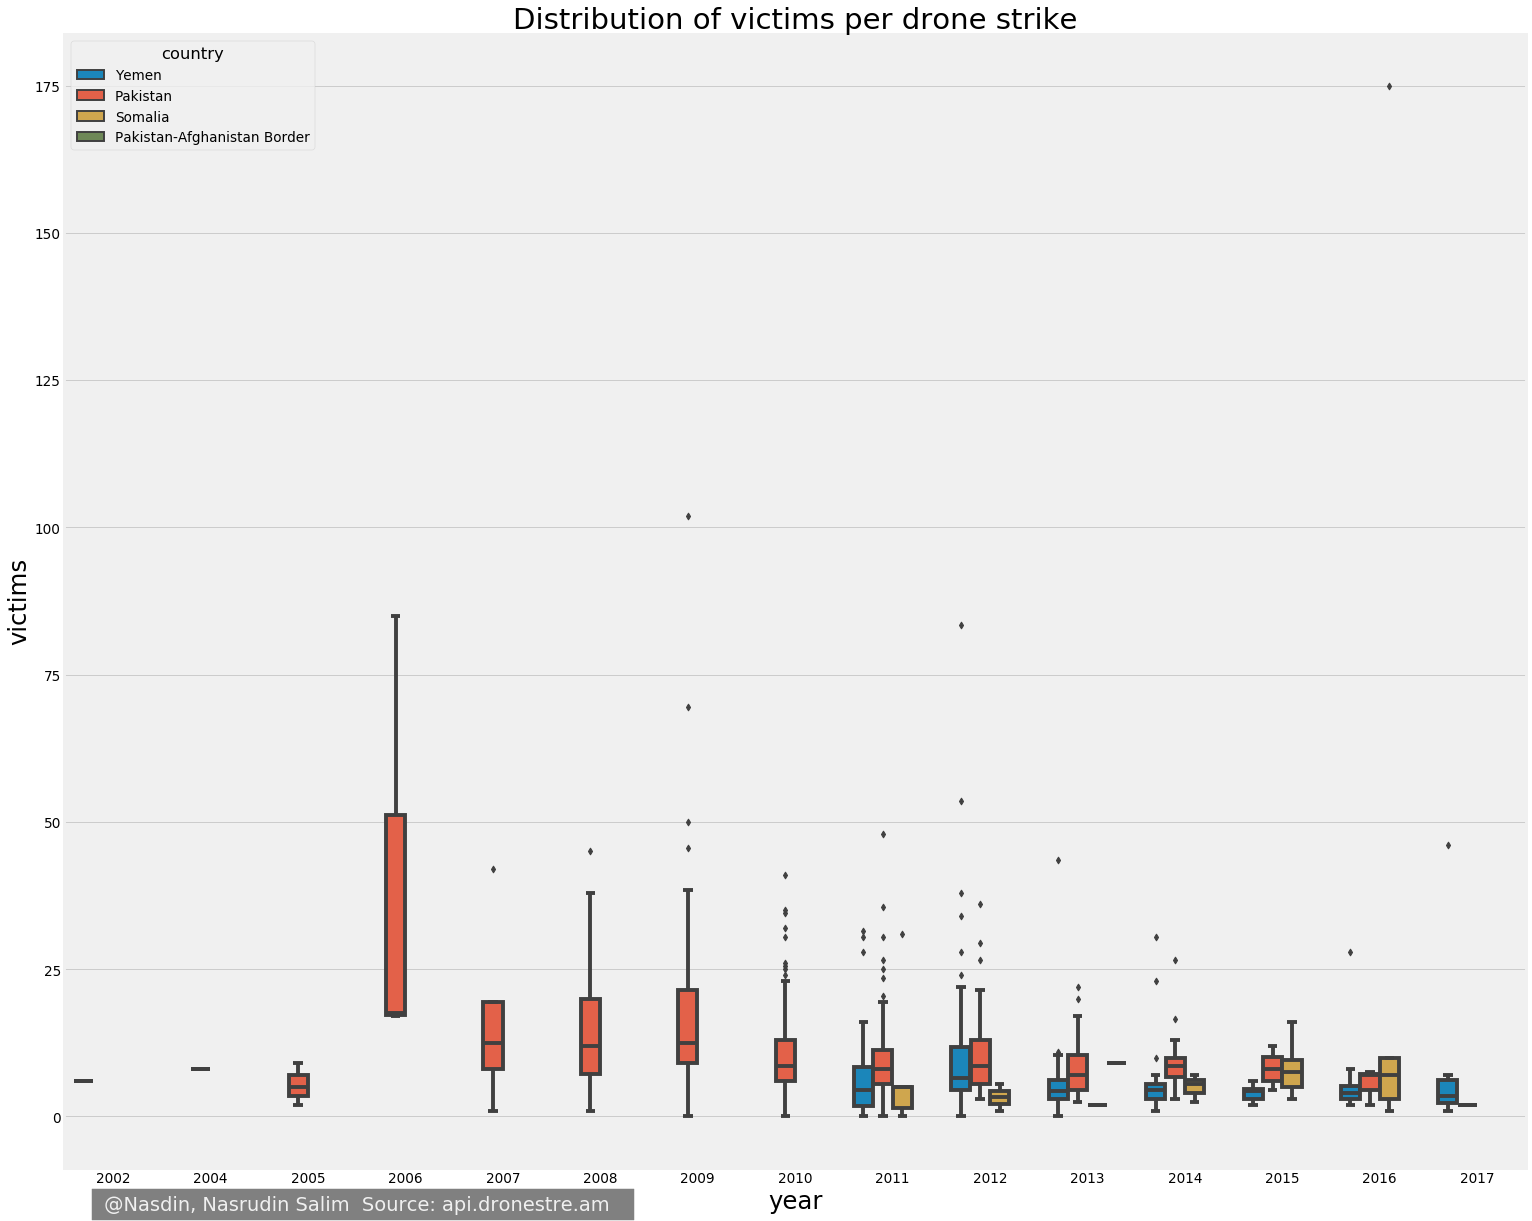

In [275]:
df['victims'] = df['deaths'] + df['injuries']


_= plt.figure(num=None,figsize=(24,20),dpi=70,facecolor='w',edgecolor='k')

plt.title("Distribution of victims per drone strike",fontsize=30)
plt.xlabel("Victims Distribution", fontsize=25)
plt.ylabel("Year",fontsize=25)


# The signature bar
_.text(x=0.1,y=0.04 , s=' @Nasdin, Nasrudin Salim  Source: api.dronestre.am   ',
    color = '#f0f0f0', backgroundcolor = 'grey',fontsize=20)




sns.boxplot(x=df['year'],y=df['victims'],hue=df['country'])


plt.savefig("DroneStrikeImpact.png")
plt.show()

# Are the bombs targetted in any particular area?

#### Lets draw the map

Get the region we want to draw by taking the max and min, then guesstimate around that area.

In [291]:
print (df['lat'].min())
print (df['lat'].max())
print (df['lon'].min())
print (df['lon'].max())

-0.354098
34.83634999
0.0
71.4969635


/home/nasdin/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/nasdin/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/nasdin/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/nasdin/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/nasdin/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDepr

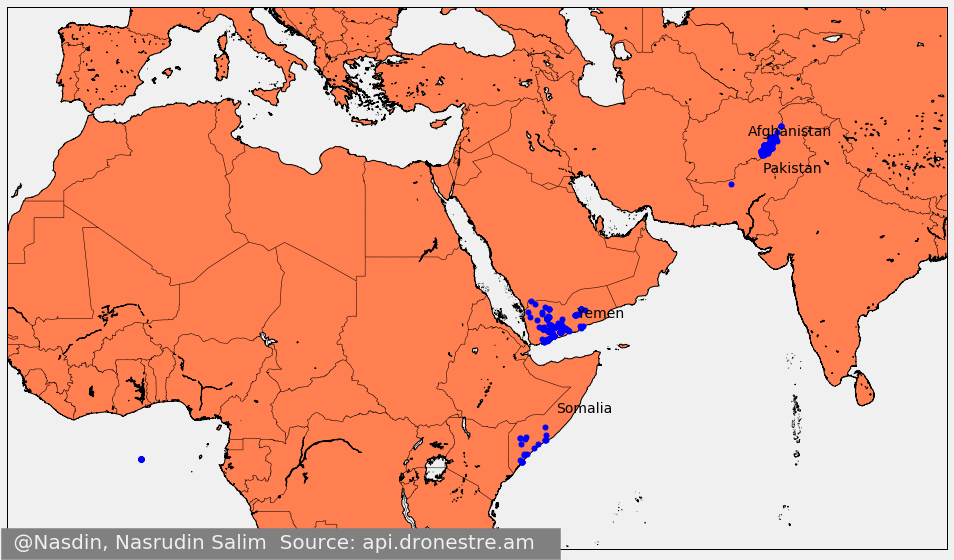

In [334]:
#Let's draw the map
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(15,15))
map1 = Basemap(projection='merc', lat_0 = 20, lon_0 = 40,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-15, llcrnrlat=-10,
    urcrnrlon=90, urcrnrlat=45)
 
map1.drawcoastlines()
map1.drawcountries()
map1.fillcontinents(color = 'coral')
map1.drawmapboundary()


#Let's plot the points in the map
lons = df['lon'].values
lats = df['lat'].values
x,y = map1(lons,lats)
    
map1.plot(x,y,'bo',markersize=5)

#Let's add some labels
labels = {'Pakistan':map1(69.34,30.37),'Yemen':map1(48.51,15.55),
          'Somalia':map1(46.196,5.15),'Afghanistan':map1(67.71,33.93)}
for country,coordinates in labels.items():
        plt.text(coordinates[0]+12000,coordinates[1]+5000,country)
        
# The signature bar
plt.text(x=0,y=10.00 , s=' @Nasdin, Nasrudin Salim  Source: api.dronestre.am   ',
    color = '#f0f0f0', backgroundcolor = 'grey',fontsize=20)
        
    

plt.savefig("bombspots.png")
plt.show()